In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/ratings_Beauty.csv")

In [ ]:
df.sample(20)

,UserId,ProductId,Rating,Timestamp
28892,A6TN4MB59J8AL,B00006K112,1.0,1.108944e+09
9371,A324GIXX5SIYGA,B000052YOX,4.0,1.349914e+09
39555,A1GR91AI7SZIN4,B0000WURP6,4.0,1.303085e+09
11355,A306N7X6NHWM92,B000052ZTY,5.0,1.237680e+09
22304,A5889INEGKCQY,B00005OAA6,1.0,1.053648e+09
34113,ACR4A8H4J7YNA,B000094ZDX,5.0,1.386029e+09
13021,A3SPO9Q64H89OC,B0000531II,5.0,1.368835e+09
844,A15X79PP60MX8I,9788072569,1.0,1.361491e+09
2208,A391L6RTUX3613,9839215019,1.0,1.403136e+09
34045,A3RWAVBREWZI0Q,B000094ZDX,1.0,1.321056e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51475 entries, 0 to 51474
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserId     51475 non-null  object 
 1   ProductId  51475 non-null  object 
 2   Rating     51474 non-null  float64
 3   Timestamp  51474 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()

UserId       0
ProductId    0
Rating       1
Timestamp    1
dtype: int64

In [ ]:
df.shape

(51475, 4)

# Visualizing the Rating

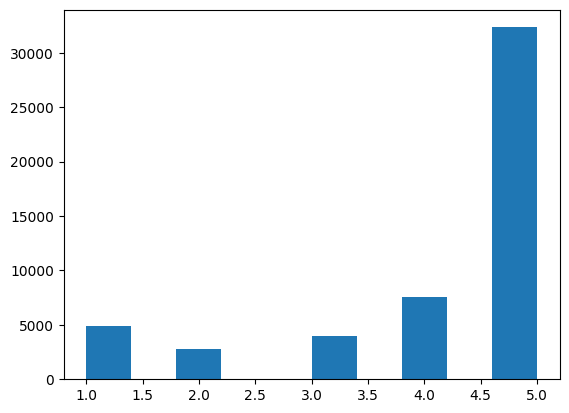

In [ ]:
plt.hist(df['Rating'])
plt.show()

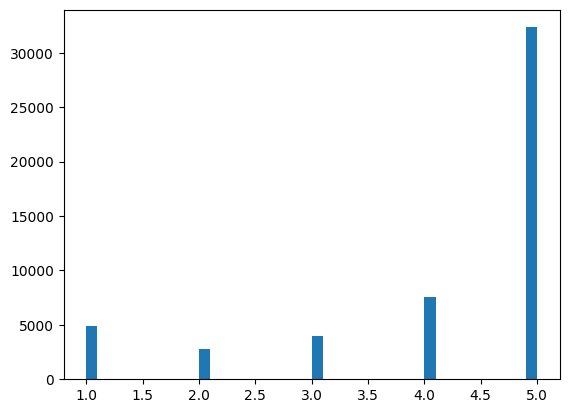

In [ ]:
plt.hist(df['Rating'],bins=40)
plt.show()

In [ ]:
df['ProductId'].nunique()

2692

In [ ]:
df.groupby('ProductId')['Rating'].count().sort_values(ascending=False)

ProductId
B0000YUXI0    2143
B00006IV2F     704
B0000632EN     686
B0000CC64W     590
B00005O0MZ     585
              ... 
B00008RGPP       1
979079651X       1
979079634X       1
0205616461       1
B000142C         0
Name: Rating, Length: 2692, dtype: int64

# Feature Engineering

In [ ]:
ratings = pd.DataFrame(df.groupby('ProductId')['Rating'].mean())
ratings['ratings_count'] = pd.DataFrame(df.groupby('ProductId')['Rating'].count())
ratings['ratings_average'] = pd.DataFrame(df.groupby('ProductId')['Rating'].mean())
ratings.head(10)

,Rating,ratings_count,ratings_average
ProductId,,,
0205616461,5.000000,1,5.000000
0558925278,4.000000,2,4.000000
0733001998,4.000000,1,4.000000
0737104473,1.000000,1,1.000000
0762451459,5.000000,1,5.000000
1304139212,5.000000,1,5.000000
1304139220,5.000000,1,5.000000
130414089X,5.000000,1,5.000000
130414643X,4.333333,3,4.333333


In [ ]:
# sns.jointplot(x='Rating',y='ratings_count',data=ratings,alpha=0.5)

# Type of Recommender System

### Methods Used

#### Four types of recommender systems:
        Popular-Based
        Content-Based
        Collaborative Filtering
        Hybrid

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


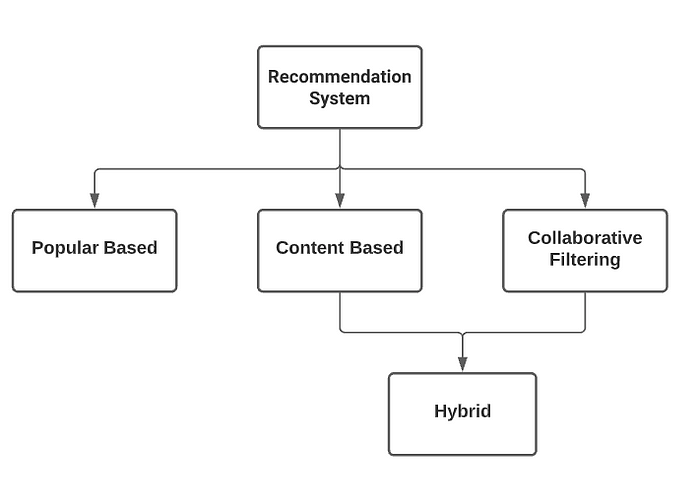

In [ ]:
vote_counts = ratings[ratings['ratings_count'].notnull()]['ratings_count'].astype('int')
vote_averages = ratings[ratings['ratings_average'].notnull()]['ratings_average'].astype('int')

C = vote_averages.mean()

print("Average rating of product across the whole dataset is",C)

Average rating of product across the whole dataset is 3.8900037160906726


In [ ]:
m = vote_counts.quantile(0.95)
print("Minimum votes required to be listed in the chart is",m)

Minimum votes required to be listed in the chart is 89.44999999999982


In [ ]:
qualified = ratings[(ratings['ratings_count'] >= m) &
                    (ratings['ratings_count'].notnull()) &
                    (ratings['ratings_average'].notnull())][['ratings_count', 'ratings_average']]

In [ ]:
qualified['ratings_count'] = qualified['ratings_count'].astype('int')
qualified['ratings_average'] = qualified['ratings_average'].astype('int')
qualified.head().sort_values(by='ratings_count', ascending=False)

,ratings_count,ratings_average
ProductId,,
B00004TUBL,558,4
B00004TUBV,171,4
B00004U9UY,146,4
B00004TMFE,137,3
B00004U9V2,92,4


In [ ]:
def weighted_rating(x):
    v = x['ratings_count']
    R = x['ratings_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [ ]:
qualified

,ratings_count,ratings_average,wr
ProductId,,,
B00004TMFE,137,3,3.351560
B00004TUBL,558,4,3.984803
B00004TUBV,171,4,3.962222
B00004U9UY,146,4,3.958211
B00004U9V2,92,4,3.945775
...,...,...,...
B000136P7S,106,4,3.949659
B00013TQRE,164,3,3.314109
B000141O6E,135,4,3.956163


In [ ]:
# wr_plot = qualified['wr'].plot.bar(figsize=(12, 4))
# wr_plot.set_title("Weight Rating Bar-Plot")
# wr_plot.set_xlabel("productId")
# wr_plot.set_ylabel("rating")

# 2. Content-Based

In [ ]:
! pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811594 sha256=836b6548a89cc4b2061de7a99d345efc15344f5a1fad033bdbc610dd8b7936e0
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
data = df.drop("Timestamp",axis=1)

In [ ]:
data.head(10)

In [ ]:
reader = Reader()


In [ ]:
data.head()

,UserId,ProductId,Rating
0,A39HTATAQ9V7YF,0205616461,5.0
1,A3JM6GV9MNOF9X,0558925278,3.0
2,A1Z513UWSAAO0F,0558925278,5.0
3,A1WMRR494NWEWV,0733001998,4.0
4,A3IAAVS479H7M7,0737104473,1.0


In [ ]:
data = Dataset.load_from_df(df[['UserId', 'ProductId', 'Rating']], reader)

In [ ]:
# Use the famous SVD algorithm
svd = SVD()

# Run 5-fold cross-validation and then print results
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5731  1.5868  nan     1.5519  1.5670  nan     nan     
MAE (testset)     0.8444  0.8570  nan     0.8291  0.8437  nan     nan     
Fit time          0.74    0.71    0.72    0.71    0.72    0.72    0.01    
Test time         0.10    0.17    0.08    0.06    0.08    0.10    0.04    


{'test_rmse': array([1.5731168 , 1.58682654,        nan, 1.55194969, 1.56702296]),
 'test_mae': array([0.84439048, 0.85701797,        nan, 0.82914036, 0.84371054]),
 'fit_time': (0.7363593578338623,
  0.711463451385498,
  0.7212176322937012,
  0.7105836868286133,
  0.718991756439209),
 'test_time': (0.09954166412353516,
  0.16619586944580078,
  0.08421587944030762,
  0.06386518478393555,
  0.07912492752075195)}

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1.369699e+09
1,A3JM6GV9MNOF9X,0558925278,3.0,1.355443e+09
2,A1Z513UWSAAO0F,0558925278,5.0,1.404691e+09
3,A1WMRR494NWEWV,0733001998,4.0,1.382573e+09
4,A3IAAVS479H7M7,0737104473,1.0,1.274227e+09


In [ ]:
df['UserId'].value_counts()

A281NPSIMI1C2R    42
A1Z54EM24Y40LL    25
A3M174IC0VXOS2    23
AK7CAW3N1XZV6     15
AKMEY1BSHSDG7     14
                  ..
A995W2IMM0T91      1
A14UVWTSWCSXBV     1
A1EW1MEB1HUDUL     1
AZ3Q0NO8CKYG1      1
A11HJPZ1UBFEN5     1
Name: UserId, Length: 48394, dtype: int64

In [ ]:
# Check specific userId review
df[df['UserId'] == 'A281NPSIMI1C2R']

,UserId,ProductId,Rating,Timestamp
3977,A281NPSIMI1C2R,B000050B6X,5.0,1.040947e+09
4104,A281NPSIMI1C2R,B000050FET,5.0,9.771840e+08
4423,A281NPSIMI1C2R,B000052WYL,4.0,1.380586e+09
5597,A281NPSIMI1C2R,B000052Y33,5.0,1.052611e+09
14037,A281NPSIMI1C2R,B00005331J,5.0,1.052611e+09
14974,A281NPSIMI1C2R,B0000535RA,5.0,1.128211e+09
15400,A281NPSIMI1C2R,B0000535U2,5.0,1.099354e+09
15679,A281NPSIMI1C2R,B0000535UM,5.0,1.024186e+09
15740,A281NPSIMI1C2R,B0000535UN,5.0,1.024186e+09
15853,A281NPSIMI1C2R,B0000535UT,5.0,1.338422e+09


In [ ]:
# predict based on this data
svd.predict('A3LDPF5FMB782Z', 'B00008MOQN', 4.0)

Prediction(uid='A3LDPF5FMB782Z', iid='B00008MOQN', r_ui=4.0, est=5, details={'was_impossible': False})

https://www.kaggle.com/code/farizhaykal/recommendation-system-for-amazon-products